# Teaching Kids: Random Walk

Imagine you are standing at a point. You flip a coin. 
- If it lands heads (H), you take one step left.
- If it lands tails (T), you take one step right.

After you flip the coin _n_ times, how far will you be from your _original_ point?

This process is called **Random Walk**

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import namedtuple

In [2]:
def flip_coin():
    return random.sample([-1,1],1)[0]

In [3]:
def generate_walk(path_length):
    """
    Generate a random walk by flipping a coin 'path_length' times and 
    adding each flip value i.e. -1 OR 1 to the previous flip value.
    Return a list of running total.
    """
    walk = list()
    for x in range(path_length):
        walk.append(flip_coin() + walk[-1] if len(walk) > 0 else flip_coin())
        
    return walk

In [4]:
def plot_walk(walks):
    """
    Helper function to plot random walks in 'walks' (coin flips).
    Each walk is an array of running total of a coin flip and its
    length represent number of coin flips
    """
    plt.figure(figsize=(15,8))
    
    for walk in walks:
        plt.step(range(1, len(walk)+1), walk)
        
    plt.xlabel("# of coin flips")
    plt.ylabel("Sum of coin flips")
    plt.grid(True)
    plt.show()
    #return plt

### Path length of random walk i.e. number of coin flips

In [5]:
path_length = 100

### Generate one random walk and plot it

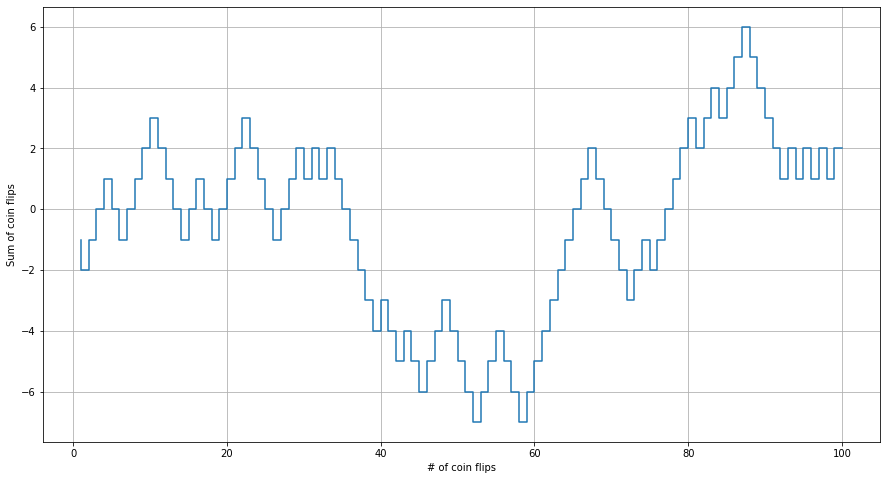

In [6]:
plot_walk([generate_walk(path_length)])

### Now generate 5 random walks and plot them

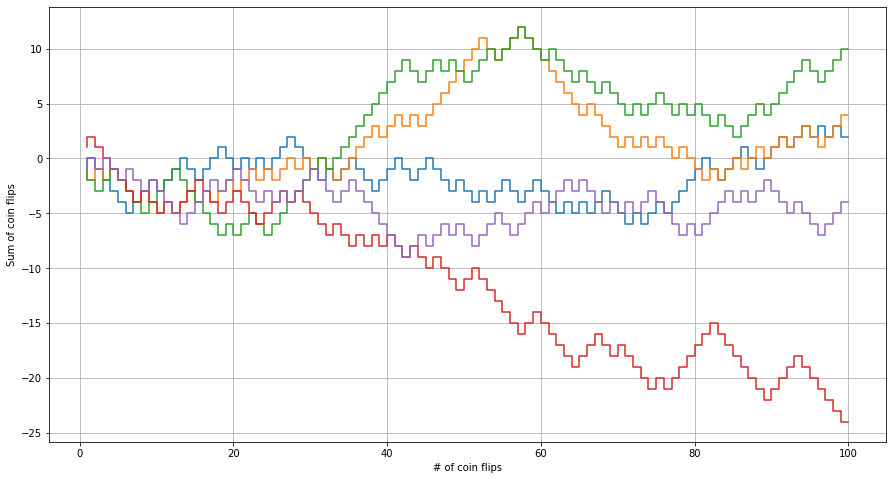

In [7]:
plot_walk([generate_walk(path_length) for _ in range(5)])

### Let's do 100 random walks
The plot below is crowded but there are some interesting features we can start observing. We are beginning to see edge cases - these are the walks, which have the max and min cumulative sums

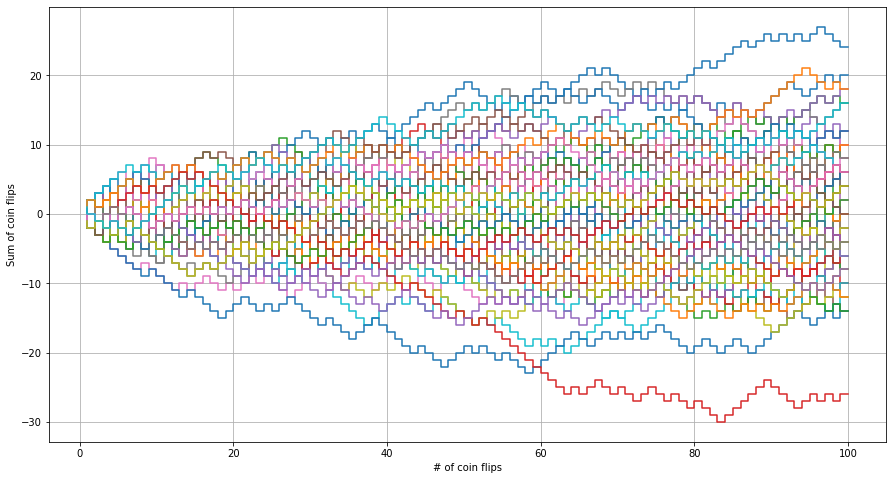

In [8]:
plot_walk([generate_walk(path_length) for _ in range(100)])

## Let's simulate 10K random walks 
This will give us a good sense of distribution and allow us to _filter down_ to the most 'interesting' ones

In [9]:
simulate_walks = [generate_walk(path_length) for _ in range(10000)]

### Generate interesting stats before we filter down

In [10]:
cumulative_sums = [walk[-1] for walk in simulate_walks]
max_sum = max(cumulative_sums)
min_sum = min(cumulative_sums)
mean_sum = sum(cumulative_sums)/len(cumulative_sums)
print('Max sum: {0}'.format(max_sum))
print('Min sum: {0}'.format(min_sum))
print('Average: {0}'.format(mean_sum))
print('5th Percentile: {0}'.format(np.percentile(cumulative_sums, 5)))
print('50th Percentile: {0}'.format(np.percentile(cumulative_sums, 50)))
print('95th Percentile: {0}'.format(np.percentile(cumulative_sums, 95)))

Max sum: 38
Min sum: -36
Average: -0.0488
5th Percentile: -16.0
50th Percentile: 0.0
95th Percentile: 16.0


### Of the 10k walks, how many added to zero i.e. brought you back to the origin point?

In [11]:
zero_sum = list(filter(lambda x:x[-1] == 0, simulate_walks))
print("# of walks summing to zero: {0}".format(len(zero_sum)))
print("% of walks summing to zero: {0}".format(len(zero_sum)/len(cumulative_sums)*100))                

# of walks summing to zero: 825
% of walks summing to zero: 8.25


#### Plot these "zero sum" walks
Notice _all_ these walks converge to 0 when number of flips reach 100

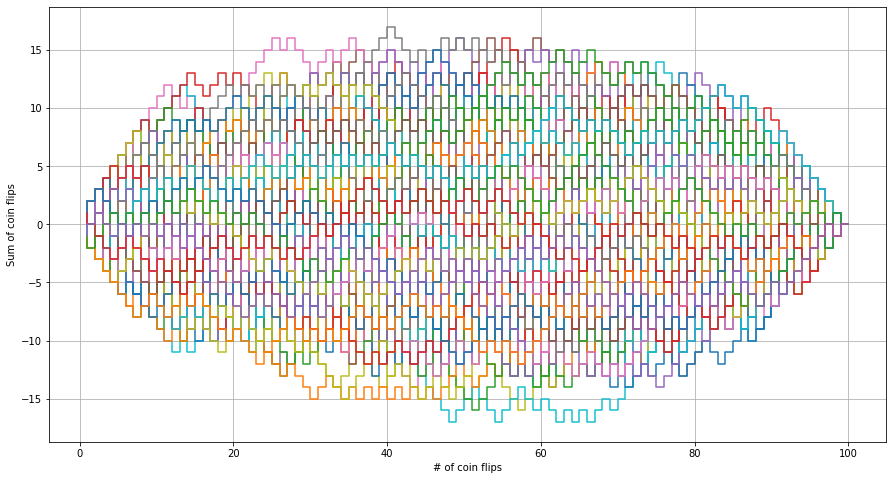

In [12]:
plot_walk(zero_sum)

### Demonstrate the most and least probable random walks
Filter down simulated random walks by picking the ones, which had max and min sum

In [13]:
max_sum_walk = list(filter(lambda x:x[-1] == max_sum, simulate_walks))[0]
min_sum_walk = list(filter(lambda x:x[-1] == min_sum, simulate_walks))[0]

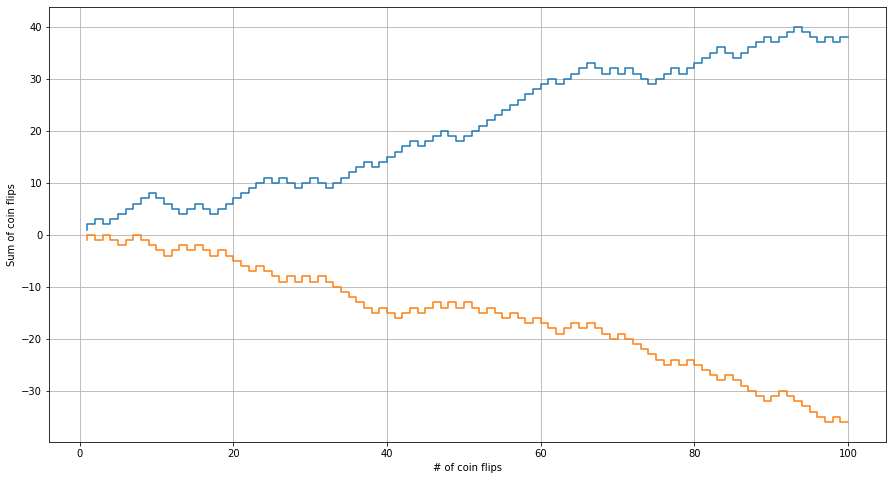

In [14]:
plot_walk([max_sum_walk, min_sum_walk])

### How does the frequency distribution look like?

(array([3.000e+00, 1.600e+01, 4.200e+01, 1.190e+02, 2.550e+02, 5.200e+02,
        4.200e+02, 1.080e+03, 1.358e+03, 1.597e+03, 1.569e+03, 1.214e+03,
        8.420e+02, 3.000e+02, 3.810e+02, 1.770e+02, 8.000e+01, 2.000e+01,
        6.000e+00, 1.000e+00]),
 array([-36. , -32.3, -28.6, -24.9, -21.2, -17.5, -13.8, -10.1,  -6.4,
         -2.7,   1. ,   4.7,   8.4,  12.1,  15.8,  19.5,  23.2,  26.9,
         30.6,  34.3,  38. ]),
 <a list of 20 Patch objects>)

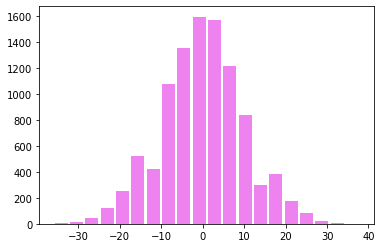

In [15]:
plt.hist(cumulative_sums, bins=20, color='violet', rwidth=0.85)

## In a random walk of length 100, can we ever get the cumulative sum of 100 or -100?
That is, can we get heads H<sup>100</sup> times or tails T<sup>100</sup> in successive 100 coin flips?
The answer is yes, but probability is:

$P(H^{100})\:or\:P(T^{100}) = \frac{1}{2^{100}}$

Let's compute this value

In [16]:
print(1/2**100)

7.888609052210118e-31


## Random walk in 2D plane
On a 2D plane, assume that we can move in 4 directions - up, down, right, left. Instead of a coin, we will rely on an _abstract_ compass, which randomly tells us to go east, west, north, south every time we take a step. Each of the outcomes are equally likely. So first let's build this "navigator".

In [3]:
Move = namedtuple('Move','x y')

compass = {'E':Move(1,0), 'W':Move(-1,0), 
           'N':Move(0,1), 'S':Move(0,-1)}

In [4]:
class Position:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __str__(self):
        return 'x={0},y={1}'.format(self.x, self.y)
    
    def __repr__(self):
        return str(self)

In [5]:
def random_compass(position):
    """ 
    Given an input point (x,y), move east or west or north or south, and
    return the new position (x,y)
    """
    # Pick one of the random directions to go (E,W,N,S)
    direction = random.sample(compass.keys(),1)[0]
    return Position(position.x + compass[direction].x, 
                    position.y + compass[direction].y)

In [6]:
def random_2d_walk(length):
    """
    Starting from (0,0), use or compass to build a path of length 
    and return it
    """
    assert(length > 0)
    # Make (0,0) as origin
    path = [Position(0,0)]     
    for _ in range(length):
        path.append(random_compass(path[-1]))
        
    return path

### Plotting 2D walk

In [7]:
def plot_2d_walk(path):
    
    plt.figure(figsize=(15,8))
    axis = plt.gca()
    # Hide axis labels to create an empty box
    #axis.axes.xaxis.set_visible(False)
    #axis.axes.yaxis.set_visible(False)
    axis.set_aspect('equal', adjustable='box')
    plt.grid(True)
    
    plt.plot([point.x for point in path], [point.y for point in path], linewidth=2)

### Do 100 steps random walk

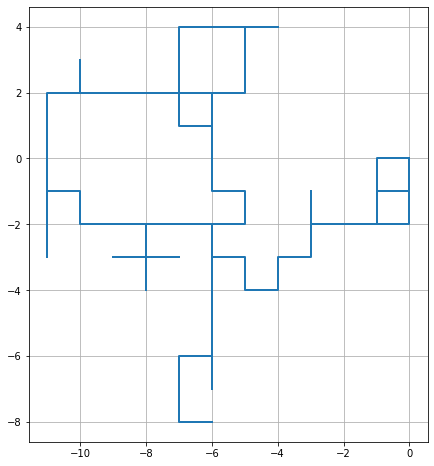

In [8]:
plot_2d_walk(random_2d_walk(100))

### Do 10k steps random walk

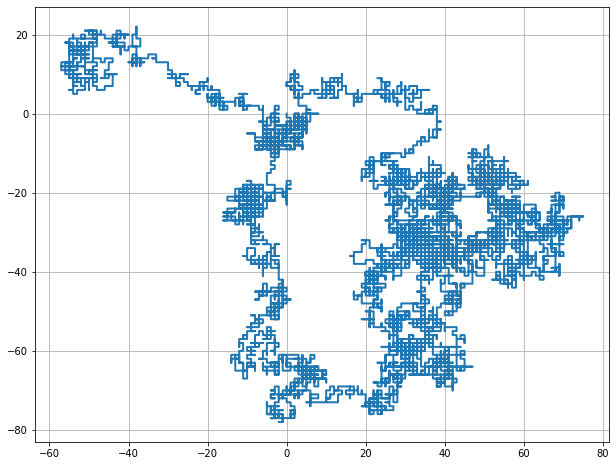

In [29]:
plot_2d_walk(random_2d_walk(10000))